In [1]:
# K-Means Clustering

import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

from sklearn.cluster import KMeans

In [2]:
# Prepare data. 
X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

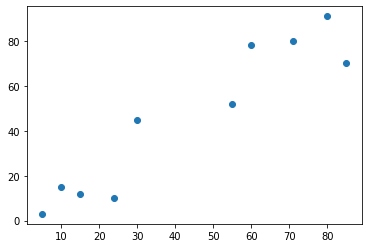

In [3]:
plt.scatter(X[:,0], X[:,1], label='True Position')

In [4]:
# Create clusters. 
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
# Centroid values
print(kmeans.cluster_centers_)

[[70.2 74.2]
 [16.8 17. ]]


In [6]:
# See the labels. 
print(kmeans.labels_)

[1 1 1 1 1 0 0 0 0 0]


In [7]:
cluster_predicted = kmeans.predict(X)

In [8]:
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(cluster_predicted)], axis=1)
merge_data.columns = ['x','y','cluster']
merge_data

,x,y,cluster
0,5,3,1
1,10,15,1
2,15,12,1
3,24,10,1
4,30,45,1
5,85,70,0
6,71,80,0
7,60,78,0
8,55,52,0
9,80,91,0


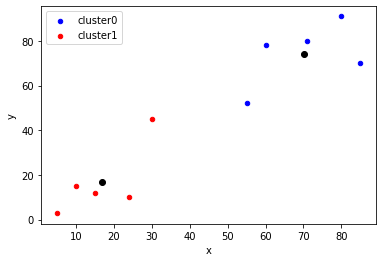

In [9]:
# Visualize the data. 
colors = ['blue','red']
# plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
ax = None
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='x', y='y', 
                           color=colors[i], label=f'cluster{i}', ax=ax)

# Plot the centroids.
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

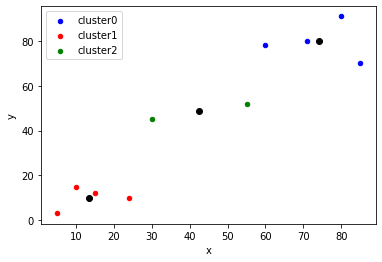

In [10]:
# Num of cluster is 3. 

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
# print(kmeans.labels_)
cluster_predicted = kmeans.predict(X)
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(cluster_predicted)], axis=1)
merge_data.columns = ['x','y','cluster']

colors = ['blue','red','green']
ax = None
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='x', y='y', 
                           color=colors[i], label=f'cluster{i}', ax=ax)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

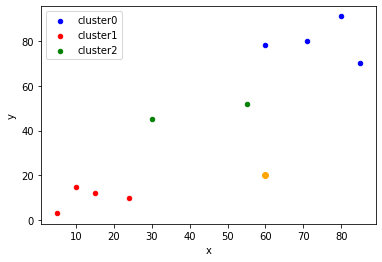

In [11]:
# Add a new data and predict the cluster. 

ax = None
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='x', y='y', 
                           color=colors[i], label=f'cluster{i}', ax=ax)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')


new_data = np.array([[60, 20]])
plt.scatter(new_data[:,0], new_data[:,1], c='orange')

In [12]:
cluster_pred = kmeans.predict(new_data)
cluster_pred

array([2], dtype=int32)

In [13]:
new_data = np.append(new_data, cluster_pred)
new_data_s = pd.Series(new_data, index=merge_data.columns)
new_data_s

x          60
y          20
cluster     2
dtype: int64

In [14]:
# Append the new data. 

merge_data = merge_data.append(new_data_s, ignore_index=True)
merge_data

,x,y,cluster
0,5,3,1
1,10,15,1
2,15,12,1
3,24,10,1
4,30,45,2
5,85,70,0
6,71,80,0
7,60,78,0
8,55,52,2
9,80,91,0


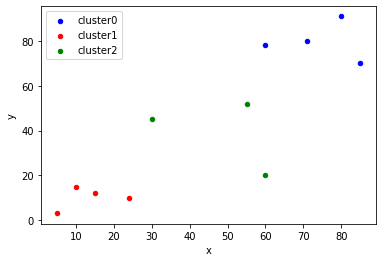

In [15]:
# Visualize. 
ax = None
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='x', y='y', 
                           color=colors[i], label=f'cluster{i}', ax=ax)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

In [16]:
# More than 2 dimensions

billboard_data = pd.read_csv('billboard_audiences_data/billboards_20191112.csv')
billboard_data.head()

/Users/kei/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,locationHash,name,directionId,directionName,lat,lng,googlePlacesId,typeId,typeName
0,20,fe707bdee17281102dc95c9033379149,I-215 and Durango,7,North,36.06556000,-115.272515,"Las Vegas, NV",75.0,Bulletin
1,21,203f5b73a45813bcd385e4bf647395b8,I-215 and Jones,10,East,36.06669000,-115.215070,"Las Vegas, NV",75.0,Bulletin
2,22,90b91c6b8e1d3160c023b6a074133cad,I-215 and Valley View 2,10,East,36.06770000,-115.192320,"Las Vegas, NV",75.0,Bulletin
3,23,68bac0690e1090a12ba0d398d083d3b4,I-15 and Warm Springs,11,South,36.05768500,-115.179950,"Enterprise, NV",75.0,Bulletin
4,24,25c0366830f49de9358d96a00378a3ee,I-15 and St. Rose Pkwy,12,West,35.97996000,-115.180570,"Las Vegas, NV",75.0,Bulletin


In [17]:
billboard_data.shape

(126005, 10)

In [18]:
typeId_0 = billboard_data[billboard_data['typeId'] == 0]
typeId_0.head()

,id,locationHash,name,directionId,directionName,lat,lng,googlePlacesId,typeId,typeName
34,56,60165c655d7b624f9d533faffcd83d25,SDI Server,7,North,40.71280000,74.00590,"Las Vegas, NV",0.0,NaN
48,73,c1bdd17f955047c7475eb04b89fb9e5c,Rockhouse Promo TVs,7,North,36.12273530,-115.17246,"Las Vegas, NV",0.0,NaN
73,100,9d96c9ff3658d30b35675c1f7b7d2b14,theD_Ballroom,7,North,36.10000000,-115.08000,"Las Vegas, NV",0.0,NaN
74,102,e27287aa59a4fd91d4bc859c7e4a7869,Inside Valet,11,South,36.10000000,-115.08000,"Las Vegas, NV",0.0,NaN
75,103,e27287aa59a4fd91d4bc859c7e4a7869,DLVEC Portal,11,South,36.10000000,-115.08000,"Las Vegas, NV",0.0,NaN


In [19]:
# billboard_data_sub = billboard_data[['lat','lng','typeId']]
billboard_data_sub = billboard_data[['typeId']]
billboard_data_sub.head()

,typeId
0,75.0
1,75.0
2,75.0
3,75.0
4,75.0


In [20]:
typeId_count = billboard_data_sub['typeId'].value_counts()
typeId_count

164.0    48543
171.0    25460
188.0     8509
75.0      8318
177.0     7524
184.0     5289
0.0       4132
165.0     3655
181.0     2236
190.0     1462
48.0      1198
189.0     1170
94.0      1069
166.0     1032
172.0     1004
168.0      916
180.0      730
175.0      652
169.0      556
186.0      537
109.0      346
173.0      302
187.0      285
182.0      249
131.0      240
151.0      214
179.0       91
178.0       78
174.0       73
170.0       29
163.0       28
16.0        22
66.0        13
99.0        12
167.0       11
2.0         10
105.0        6
176.0        2
185.0        1
Name: typeId, dtype: int64

In [21]:
# Remove rows where typeId is equal to 0. 
billboard_data_sub = billboard_data_sub[billboard_data_sub['typeId'] != 0]
billboard_data_sub.shape

(121873, 1)

In [22]:
##########
# Correlation between typeId and gender

billboard_data2 = pd.read_csv('data/corr_fe_and_typeid.csv', encoding='utf8')
billboard_data2_test1 = billboard_data2.copy()
billboard_data2_test1.head()

,billboard_id,type_id,aud1
0,1,101,80
1,2,102,20
2,3,103,15
3,4,103,12
4,5,102,30


In [23]:
# billboard_data2['type_id'] =  billboard_data2['type_id'].apply(lambda x: x * 1000)
# billboard_data2.head()

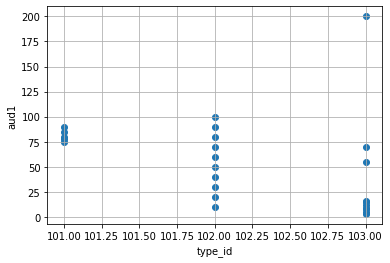

In [24]:
plt.scatter(billboard_data2_test1['type_id'], billboard_data2_test1['aud1'])
plt.xlabel('type_id')
plt.ylabel('aud1')
plt.grid(True)

In [25]:
# Create training set. 
training_data = billboard_data2_test1[['type_id','aud1']]


# Standardization.  

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(training_data)
# training_data_std = sc.transform(training_data)
# training_data_std
# count_for_bill_aud.info()

In [26]:
# Learn the data. 
kmeans = KMeans(n_clusters=3)
kmeans.fit(training_data)
# kmeans.fit(training_data_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
# Visualize the result. 
cluster_predicted = kmeans.predict(training_data)
# cluster_predicted = kmeans.predict(training_data_std)
billboard_data2_test1['cluster'] = cluster_predicted
billboard_data2_test1

,billboard_id,type_id,aud1,cluster
0,1,101,80,0
1,2,102,20,1
2,3,103,15,1
3,4,103,12,1
4,5,102,30,1
5,6,103,55,0
6,7,103,9,1
7,8,101,85,0
8,9,102,80,0
9,10,103,70,0


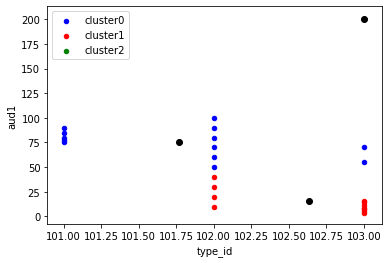

In [28]:
colors = ['blue','red','green']
ax = None
for i, data in billboard_data2_test1.groupby('cluster'):
    ax = data.plot.scatter(x='type_id', y='aud1', 
                           color=colors[i], label=f'cluster{i}', ax=ax)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

In [29]:
kmeans.cluster_centers_

array([[101.769,  75.615],
       [102.636,  15.273],
       [103.   , 200.   ]])

In [30]:
# 

In [31]:
# Simpler way (score based on the median count for that location type )

billboard_data2_test2 = billboard_data2.copy()
billboard_data2_test2

,billboard_id,type_id,aud1
0,1,101,80
1,2,102,20
2,3,103,15
3,4,103,12
4,5,102,30
5,6,103,55
6,7,103,9
7,8,101,85
8,9,102,80
9,10,103,70


In [32]:
# Get the median count for each location type. 
median_for_typeid = billboard_data2_test2.groupby('type_id')['aud1'].median()
median_for_typeid

type_id
101    80.0
102    55.0
103    13.5
Name: aud1, dtype: float64

In [33]:
median_max = median_for_typeid.max()
median_max

80.0

In [34]:
median_min = median_for_typeid.min()
median_min

13.5

In [35]:
# Normalize it. 
median_norm = median_for_typeid.apply(lambda x: x / median_max)
print(type(median_norm))
median_norm

<class 'pandas.core.series.Series'>


type_id
101    1.00000
102    0.68750
103    0.16875
Name: aud1, dtype: float64

In [36]:
# Example
billboard_id = 10
location_type = billboard_data2_test2[billboard_data2_test2['billboard_id'] == billboard_id]['type_id']
print('location_type:', location_type)
score = median_norm[location_type].values[0]
score

location_type: 9    103
Name: type_id, dtype: int64


0.16875

In [37]:
# location type
billboard_data.head()

,id,locationHash,name,directionId,directionName,lat,lng,googlePlacesId,typeId,typeName
0,20,fe707bdee17281102dc95c9033379149,I-215 and Durango,7,North,36.06556000,-115.272515,"Las Vegas, NV",75.0,Bulletin
1,21,203f5b73a45813bcd385e4bf647395b8,I-215 and Jones,10,East,36.06669000,-115.215070,"Las Vegas, NV",75.0,Bulletin
2,22,90b91c6b8e1d3160c023b6a074133cad,I-215 and Valley View 2,10,East,36.06770000,-115.192320,"Las Vegas, NV",75.0,Bulletin
3,23,68bac0690e1090a12ba0d398d083d3b4,I-15 and Warm Springs,11,South,36.05768500,-115.179950,"Enterprise, NV",75.0,Bulletin
4,24,25c0366830f49de9358d96a00378a3ee,I-15 and St. Rose Pkwy,12,West,35.97996000,-115.180570,"Las Vegas, NV",75.0,Bulletin


In [38]:
location_types = billboard_data.groupby('typeName').size()
location_types.to_csv('data/location_types.csv')

/Users/kei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [39]:
# Multivariables

# Generate count data. 
from sklearn.datasets import make_blobs
X, _ = make_blobs(random_state=10,
                                  n_samples=20, 
                                  n_features=5, 
                                  cluster_std=10, 
                                  center_box=(20, 200), 
                                  centers=3)
print(type(X))
X = np.floor(X)
X

<class 'numpy.ndarray'>


array([[ 58.,  44., 144.,  32.,  29.],
       [ 46.,  68., 161.,  53.,  53.],
       [ 61.,  64., 151.,  51.,  29.],
       [137., 187.,  23., 110., 182.],
       [159., 190.,  17.,  94., 171.],
       [152.,  20., 142., 176., 104.],
       [155.,  31., 130., 143., 106.],
       [173.,  31., 138., 152., 113.],
       [ 49.,  68., 155.,  56.,  21.],
       [145., 198.,  18., 113., 173.],
       [163.,  32., 134., 148., 107.],
       [169., 198.,  35., 110., 172.],
       [178.,  12., 155., 156., 122.],
       [132., 194.,  25., 101., 151.],
       [ 46.,  80., 160.,  41.,  25.],
       [176.,  20., 124., 148., 128.],
       [ 63.,  40., 146.,  76.,  32.],
       [163., 193.,  13., 109., 153.],
       [ 58.,  59., 156.,  31.,  29.],
       [164.,  19., 143., 146., 119.]])

In [40]:
count_for_aud = pd.DataFrame(X, columns=['aud1','aud2','aud3','aud4','aud5'])
count_for_aud.head()

,aud1,aud2,aud3,aud4,aud5
0,58.0,44.0,144.0,32.0,29.0
1,46.0,68.0,161.0,53.0,53.0
2,61.0,64.0,151.0,51.0,29.0
3,137.0,187.0,23.0,110.0,182.0
4,159.0,190.0,17.0,94.0,171.0


In [41]:
billboard_data_sub.shape

(121873, 1)

In [42]:
billboard_data_sub = billboard_data_sub.sample(n=20)
billboard_data_sub

,typeId
112608,171.0
65600,181.0
1064,177.0
62931,48.0
26980,164.0
107012,75.0
119618,188.0
45089,164.0
75805,171.0
112424,171.0


In [43]:
billboard_data_sub = billboard_data_sub.reset_index()
billboard_data_sub

,index,typeId
0,112608,171.0
1,65600,181.0
2,1064,177.0
3,62931,48.0
4,26980,164.0
5,107012,75.0
6,119618,188.0
7,45089,164.0
8,75805,171.0
9,112424,171.0


In [44]:
billboard_data_sub = billboard_data_sub.drop('index', axis=1)
billboard_data_sub

,typeId
0,171.0
1,181.0
2,177.0
3,48.0
4,164.0
5,75.0
6,188.0
7,164.0
8,171.0
9,171.0


In [45]:
count_for_bill_aud = pd.concat([billboard_data_sub, count_for_aud], axis=1)
count_for_bill_aud

,typeId,aud1,aud2,aud3,aud4,aud5
0,171.0,58.0,44.0,144.0,32.0,29.0
1,181.0,46.0,68.0,161.0,53.0,53.0
2,177.0,61.0,64.0,151.0,51.0,29.0
3,48.0,137.0,187.0,23.0,110.0,182.0
4,164.0,159.0,190.0,17.0,94.0,171.0
5,75.0,152.0,20.0,142.0,176.0,104.0
6,188.0,155.0,31.0,130.0,143.0,106.0
7,164.0,173.0,31.0,138.0,152.0,113.0
8,171.0,49.0,68.0,155.0,56.0,21.0
9,171.0,145.0,198.0,18.0,113.0,173.0


In [46]:
# Standardization.  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(count_for_bill_aud)
count_for_bill_aud_std = sc.transform(count_for_bill_aud)
count_for_bill_aud_std
# count_for_bill_aud.info()

array([[ 0.473, -1.256, -0.606,  0.616, -1.561, -1.278],
       [ 0.71 , -1.491, -0.271,  0.911, -1.095, -0.852],
       [ 0.615, -1.198, -0.327,  0.738, -1.139, -1.278],
       [-2.438,  0.286,  1.391, -1.484,  0.171,  1.44 ],
       [ 0.308,  0.716,  1.432, -1.588, -0.184,  1.244],
       [-1.799,  0.579, -0.941,  0.582,  1.637,  0.054],
       [ 0.876,  0.637, -0.787,  0.373,  0.904,  0.09 ],
       [ 0.308,  0.989, -0.787,  0.512,  1.104,  0.214],
       [ 0.473, -1.432, -0.271,  0.807, -1.028, -1.42 ],
       [ 0.473,  0.442,  1.544, -1.571,  0.238,  1.28 ],
       [ 0.473,  0.794, -0.773,  0.443,  1.015,  0.107],
       [ 0.473,  0.911,  1.544, -1.276,  0.171,  1.262],
       [ 0.308,  1.086, -1.053,  0.807,  1.192,  0.374],
       [ 0.781,  0.188,  1.488, -1.45 , -0.029,  0.889],
       [-1.799, -1.491, -0.103,  0.894, -1.361, -1.349],
       [ 0.615,  1.047, -0.941,  0.269,  1.015,  0.48 ],
       [ 0.308, -1.159, -0.662,  0.651, -0.584, -1.225],
       [ 0.331,  0.794,  1.474,

In [47]:
# Learning. 
kmeans = KMeans(init='random', n_clusters=6, random_state=0)
kmeans.fit(count_for_bill_aud_std)
labels = pd.Series(kmeans.labels_, name='cluster_number')
print(type(labels))
labels

<class 'pandas.core.series.Series'>


0     1
1     1
2     1
3     5
4     3
5     4
6     2
7     2
8     1
9     3
10    2
11    3
12    2
13    3
14    0
15    2
16    1
17    3
18    0
19    2
Name: cluster_number, dtype: int32

0    2
1    5
2    6
3    5
4    1
5    1
Name: cluster_number, dtype: int64


Text(0, 0.5, 'num of data points')

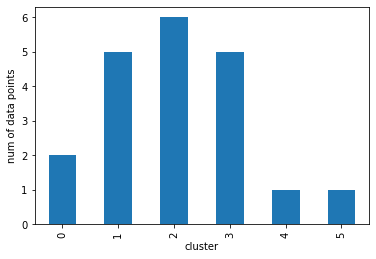

In [48]:
# Count the number of memebers in each cluster. 
print(labels.value_counts(sort=False))

ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster')
ax.set_ylabel('num of data points')

Text(0, 0.5, 'Cost')

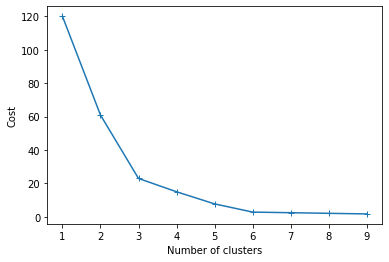

In [49]:
# Elbow curve to find the best number of clusters. 

dist_list = []
for i in range(1, 10): 
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(count_for_bill_aud_std)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')

0    7
1    5
2    2
3    6
Name: cluster_number, dtype: int64


Text(0, 0.5, 'num of data points')

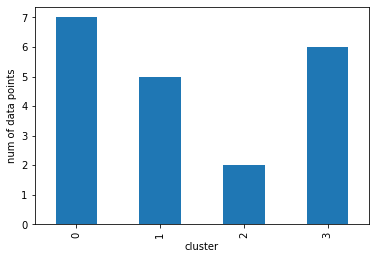

In [50]:
# The optimal number of clusters is four. 
kmeans = KMeans(init='random', n_clusters=4, random_state=0)
kmeans.fit(count_for_bill_aud_std)

labels = pd.Series(kmeans.labels_, name='cluster_number')
print(labels.value_counts(sort=False))
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster')
ax.set_ylabel('num of data points')

In [51]:
# Analyze the result. 

billbord_with_cluster = pd.concat([count_for_bill_aud, labels], axis=1)
billbord_with_cluster

,typeId,aud1,aud2,aud3,aud4,aud5,cluster_number
0,171.0,58.0,44.0,144.0,32.0,29.0,1
1,181.0,46.0,68.0,161.0,53.0,53.0,1
2,177.0,61.0,64.0,151.0,51.0,29.0,1
3,48.0,137.0,187.0,23.0,110.0,182.0,3
4,164.0,159.0,190.0,17.0,94.0,171.0,3
5,75.0,152.0,20.0,142.0,176.0,104.0,0
6,188.0,155.0,31.0,130.0,143.0,106.0,0
7,164.0,173.0,31.0,138.0,152.0,113.0,0
8,171.0,49.0,68.0,155.0,56.0,21.0,1
9,171.0,145.0,198.0,18.0,113.0,173.0,3


In [52]:
cross_cluster_typeId = billbord_with_cluster.groupby(['cluster_number','typeId']).size()
cross_cluster_typeId

cluster_number  typeId
0               75.0      1
                164.0     3
                171.0     1
                177.0     1
                188.0     1
1               164.0     1
                171.0     2
                177.0     1
                181.0     1
2               75.0      2
3               48.0      1
                164.0     1
                165.0     1
                171.0     2
                184.0     1
dtype: int64

In [53]:
cross_cluster_typeId = cross_cluster_typeId.unstack().fillna(0)
cross_cluster_typeId

typeId,48.0,75.0,164.0,165.0,171.0,177.0,181.0,184.0,188.0
cluster_number,,,,,,,,,
0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0


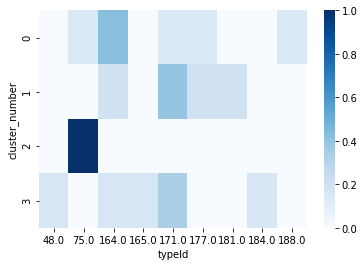

In [54]:
sns.heatmap(cross_cluster_typeId.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')